# Simpson's rule

We have now demonstrated both the rectangular and trapezium integration methods. While the trapezium method looks like a visibly better fit, there are cases (including the cases above) where the rectangle method is actually more accurate. However, this can be improved by using a "2nd-order" solution to the problem.

Simpson's rule is that. In this case rather than assuming that the curve is a series of straight lines, we assume that the curve is a series of quadratic lines. A nice introduction to this can be seen here:

https://web.stanford.edu/group/sisl/k12/optimization/MO-unit4-pdfs/4.2simpsonintegrals.pdf

(see up to slide 7). Let's try and visualize how this will look for our $e^{-x^2}dx$. Here I will compare to using only one rectangle/trapezium to emphasize the difference.

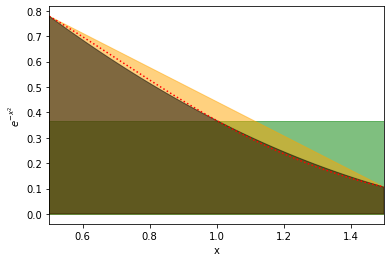

Here the red is the actual curve, the green is the rectangle, the orange the trapezium, and the black is the new quadrature fit. We can see that each is progressively fitting better.

Now we just need to evaluate this integral. Now we *could* analytically integrate the quadratic curve at every point, but it turns out that the integral of a quadratic curve over the interval $a$ to $b$ (where the midpoint is $m$) is given by:

$$\int_a^b f(x) dx \approx  \frac{(b-a)}{6}\left(f(a)+4f(m) + f(b) \right) $$

We can code this up.


## Step 1

Write a function `compute_quadrature_area(height_at_left, height_at_middle, height_at_right, width)` to compute the area of the shapes used in Simpson's rule. As described above this function should return `width/6. * (height_at_left + 4*height_at_middle + height_at_right)`

In [ ]:
def compute_quadrature_area(height_at_left, height_at_middle, height_at_right, width):
    # Complete function below



# One example to test this
example_area = compute_quadrature_area(3,2,3,2)
print("Should be 4.666666666666666")
print(f"Value computed was {example_area}")

Should be 4.666666666666666
Value computed was 4.666666666666666


## Step 2

Now we can write a function `compute_simpsons_integral(function, lower_val, upper_val, num_rectangles)`. The `function` should be the function to compute (ie. compute_ex2) in the example above, `lower_val` is the lower value of integration, `upper_val` is the upper value and `num_trapeziums` is the number of trapeziums to use. Here's roughly how this could work:

1. Call `rectangle_edges` to get the edges of your shapes (maybe rename the function if you want to avoid the confusion of calling something with rectangle in the name)
1. Call `compute_step_size` to get the step size.
1. Call `f_midpoints` to get the midpoints of your shapes
1. Call `function` to get the y_values (the heights) of your shapes at all the edges.
1. Call `function` *again* to get the y_values of the shapes at all the midpoints.
1. For all shapes use `compute_quadrature_area` to compute the area.
1. Sum over all areas.
1. Return the integral.

In [ ]:
# copy the functions you want to use from the previous workbook



In [ ]:
def compute_simpsons_integral(function, lower_val, upper_val, num_rectangles):
    # COMPLETE CODE HERE


# Checking that it works
integral = compute_simpsons_integral(compute_ex2, 0.5, 2, 5)
print("Integral should be 0.4207871236381236")
print(f"Integral was computed to be {integral}")

Integral should be 0.4207871236381236
Integral was computed to be 0.4207871236381236


### Some optimization

If we examine this closely (with 2 shapes), we can see that the right edge of the first shape is the left edge of the second shape, therefore we don't need to compute that twice. We can just compute the value of the function at all the points we need (which will be twice as many points as with the trapezium rule, as we need to compute midpoints). Then we just multiply each point by a *weighting*. This weighting will be 4 for all the midpoints, 1 for the first and last point, and 2 otherwise. So for example if we were doing this with 3 shapes we would do something like:

$$
	\begin{array}{|c|c|c|}\hline
	x & f(x) & \mbox{weight} \\
	\hline
	0.5 & 0.778801 & 1\\
	0.666667 & 0.641180 & 4\\
	0.833333 & 0.499352 & 2\\
	1 & 0.367880 & 4\\
	1.166667 & 0.256376 & 2\\
    1.333333 & 0.169013 & 4\\
    1.5 & 0.105399 & 1\\
	\hline
	\end{array}
$$

Then we just multiply all the f(x) values by the weights and sum everything up.

Integral = (0.778801 + 0.641180\*4 + 0.499352\*2 + 0.367880\*4 + 0.256376\*2 + 0.169013\*4 + 0.105399) * width / 6.


In [ ]:
def simpson_rule(function, lower_val, upper_val, num_shapes):
    h = (upper_val - lower_val)/num_shapes
    x_vals = np.linspace(lower_val, upper_val, num_shapes*2+1)
    f_vals = function(x_vals)
    weights = np.ones(len(f_vals)) # Start with all weights equal to 1, then use slicing magic
    weights[1::2] = 4 # Set every other value, starting with the second, to 4
    weights[2:-1:2] = 2 # Set every other value, starting with the third, and not including the last, to 2
    #print(weights) # Definitely use a debug statement here to check we got what we expected!!
    return h/6*np.sum(f_vals*weights)

current_area = simpson_rule(compute_ex2, 0.5, 2, 5)

print(f"I have computed the integral to be {current_area} with numerical integration using Simpson's rule")

I have computed the integral to be 0.42078712363812343 with numerical integration using Simpson's rule


## Exercise

Make a plot of the accuracy of the integral of $e^{-x^2}dx$ between $x=0.5$ and $x=2$ computed using Simpson's rule.

The x-axis of the plot should be the number of shapes used in the integral. Vary this between 1 shape and 100 shapes. The y-axis should show the value of the integral.

**HINT** As before, you don't need to write any integration code here, it's all provided above.

In [ ]:
# ADD CODE HERE


## Exercise

TL:DR: Now repeat the process but plot the accuracy using Simpson's rule, Trapezium rule and rectangle rule on the same plot!

Longer: Make a plot of the accuracy of the integral of $e^{-x^2}dx$ between $x=0.5$ and $x=2$ computed using Simpson's rule, Trapezium rule and the Rectangle rule. Show the 3 lines on the same plot.

The x-axis of the plot should be the number of shapes used in the integral. Vary this between 1 shape and 100 shapes. The y-axis should show the value of the integral.

**HINT** As before, you don't need to write any integration code here, it's all provided above.

In [ ]:
# ADD CODE HERE

## Exercise

Again, repeat the process for the other two integrals:

Make a plot of the accuracy of $\int_1^3\frac{\sin{x}}{x} dx$ computed using the "rectangle rule", the "trapezium rule" and "Simpson's rule"

The x-axis of the plot should be the number of shapes used in the integral vary this between 1 and 100 shapes. The y-axis should show the value of the integral.

**HINT** All you have to do is copy the previous solution and change the function used, and the range used. I computed the integral to be roughly 0.90257.

In [ ]:
# ADD CODE HERE

Make a plot of the accuracy of $\int_1^3 \sqrt{\sin{x}} dx$ computed using the "rectangle rule", the "trapezium rule" and "Simpson's rule"

The x-axis of the plot should be the number of shapes used in the integral vary this between 1 and 100 shapes. The y-axis should show the value of the integral.

I computed the integral to be 1.717835 here.


In [ ]:
# ADD CODE HERE

## Exercise

Compute the integral:

$$\int_{0.2}^{0.5} \tan(x) dx$$

using numerical integration

## Exercise

Compute the integral

$$\int_0^{20} e ^ {\sin(x)} dx $$

## Exercise

Compute the integral

$$\int_1^{100} \frac{\ln (x + 1)}{x} dx $$

## Exercise

Compute the integral:

$$\int_{1}^{2} \tan(x) dx$$

using numerical integration.

**WARNING** There's a catch in this one! Maybe try plotting $\tan(x)$ in this interval first?? If you can see the catch, is it still possible to integrate this?